In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

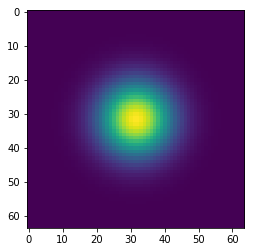

z type: float32 (4 bytes)
z size: 4 * N * N = 16384 bytes
csv file size: 86876 bytes
bin file size: 16384 bytes


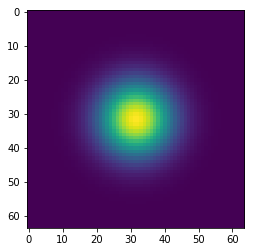

raw data equals csv data: False


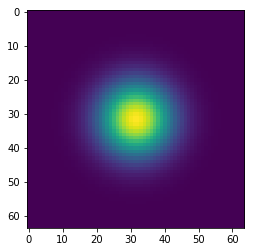

raw data equals bin data: True


In [2]:
# example of binary

from os import path
import struct

N = 64
x = np.linspace(-3, 3, N, dtype=np.float32).reshape(1, N)
y = np.linspace(-3, 3, N, dtype=np.float32).reshape(N, 1)

z = np.exp(- x ** 2 - y ** 2)

plt.imshow(z)
plt.show()

z_size = z.dtype.itemsize * N * N
print("z type: {} ({} bytes)".format(z.dtype, z.dtype.itemsize))
print("z size: {} * N * N = {} bytes".format(z.dtype.itemsize, z_size))

df = pd.DataFrame(z)

# save data as csv
df.to_csv("bin.csv", index=False, header=False)
csv_size = path.getsize("bin.csv")
print("csv file size: {} bytes".format(csv_size))

# save data as binary
fmt = struct.Struct("f" * N)
buf = bytearray(z_size)
for i, r in enumerate(z):
    fmt.pack_into(buf, z.dtype.itemsize * i * N, *r)
with open("bin.bin", "wb") as f:
    f.write(buf)
bin_size = path.getsize("bin.bin")
print("bin file size: {} bytes".format(bin_size))

# read data from csv
df_csv = pd.read_csv("bin.csv", header=None)

plt.imshow(df_csv)
plt.show()

print("raw data equals csv data: {}".format((df == df_csv).all().all()))

# read data from binary
bin_data = list()
with open("bin.bin", 'rb') as f:
    for chunk in fmt.iter_unpack(f.read()):
        bin_data.append(np.array(chunk))
df_bin = pd.DataFrame(bin_data)

plt.imshow(df_bin)
plt.show()

print("raw data equals bin data: {}".format((df == df_bin).all().all()))